In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\pesticides_train.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.shape

(88858, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [5]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [6]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [7]:
df.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [8]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [9]:
df.Number_Weeks_Used.fillna(df.Number_Weeks_Used.mean(),inplace=True)

In [10]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [11]:
cor_matrix = df.corr()
cor_matrix

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041679,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.041679,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


<AxesSubplot:>

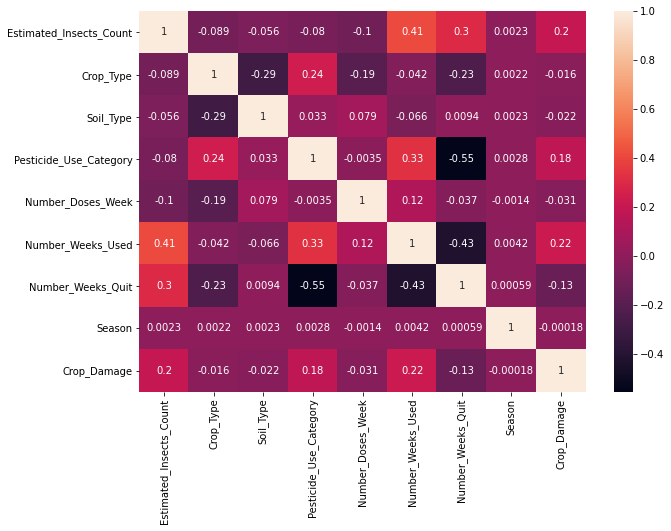

In [12]:
plt.figure(figsize=(10,7))
sb.heatmap(cor_matrix,annot=True)

In [13]:
df['Crop_Damage'] = pd.Series([1 if b == 0 else 0 for b in df["Crop_Damage"]])

In [14]:
df.Crop_Damage.value_counts()

1    74238
0    14620
Name: Crop_Damage, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df["ID"] = le.fit_transform(df["ID"])

In [17]:
df.dtypes

ID                           int32
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

<AxesSubplot:xlabel='Crop_Damage', ylabel='Soil_Type'>

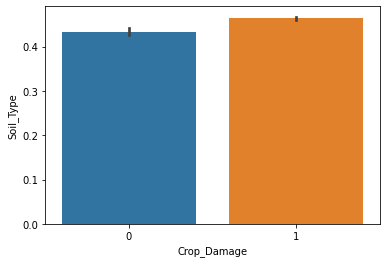

In [18]:
sb.barplot(x = "Crop_Damage", y = "Soil_Type",data=df)

<AxesSubplot:xlabel='Soil_Type', ylabel='Crop_Damage'>

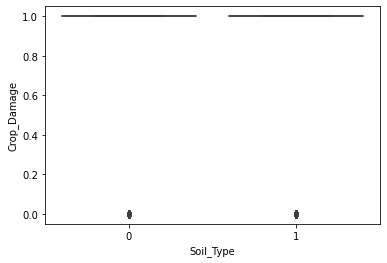

In [19]:
sb.boxplot(x = "Soil_Type",y = "Crop_Damage",data=df)

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

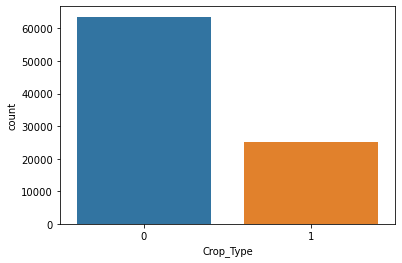

In [20]:
sb.countplot(x = "Crop_Type",data=df)

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='count'>

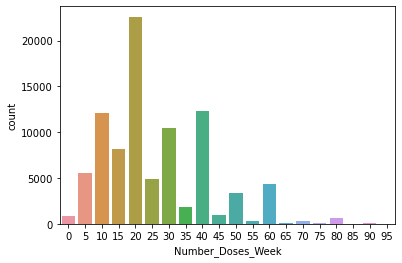

In [21]:
sb.countplot(x = "Number_Doses_Week",data=df)

In [23]:
x = df.drop(["Crop_Damage"],axis=1)
y = df["Crop_Damage"]

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [25]:
x_ros,y_ros = ros.fit_sample(x,y)

In [26]:
x_ros.shape,y_ros.shape

((148476, 9), (148476,))

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size = 0.33,random_state=10)

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [45]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
lr.score(x_test,y_test)

0.6665986366790482

In [48]:
y_test.value_counts()

0    24526
1    24472
Name: Crop_Damage, dtype: int64

In [49]:
lr.score(x_test,y_test)

0.6665986366790482

In [50]:
y_pred = lr.predict(x_test)
y_pred
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[16396  8130]
 [ 8206 16266]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     24526
           1       0.67      0.66      0.67     24472

    accuracy                           0.67     48998
   macro avg       0.67      0.67      0.67     48998
weighted avg       0.67      0.67      0.67     48998



In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=35)

In [71]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=35)

In [72]:
dtc.score(x_test,y_test)

0.9053838932201315

In [73]:
y_test.value_counts()

0    24526
1    24472
Name: Crop_Damage, dtype: int64

In [74]:
y_pred = dtc.predict(x_test)
y_pred
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(dtc.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[24107   419]
 [ 4217 20255]]
